# Step 3: Anime List Extraction
In this notebook, the data extracted from reddit will be analyzed for the different anime lists which are being used

### Import Data

In [1]:
import re
import pandas as pd

In [265]:
subreddit = 'anime'
num_posts = 500000
num_days = 360
num_comment_posts = 10000

In [4]:
posts_df = pd.read_csv(f'./data/{subreddit}_submissions_{num_posts}_{num_days}.csv', delimiter=';', header=0)
comments_df = pd.read_csv(f'./data/{subreddit}_comments_{num_comment_posts}.csv', delimiter=';', header=0)

In [12]:
print(f'Imported {len(posts_df)} submissions and {len(comments_df)} comments')

Imported 214876 submissions and 150754 comments


## Data Extraction

In [50]:
all_flairs = []
all_flairs.extend(list(posts_df["author_flair_text"].unique()))
all_flairs.extend(list(comments_df["author_flair_text"].unique()))
print(f'Extracted {len(all_flairs)} unique user flairs')

Extracted 4872 unique user flairs


In [51]:
all_flairs

[nan,
 'https://myanimelist.net/profile/SonAnka',
 'https://myanimelist.net/profile/RiverSorcerer',
 'https://myanimelist.net/profile/phiraeth',
 'https://myanimelist.net/profile/MoghyBear',
 'https://myanimelist.net/animelist/citatel',
 'https://myanimelist.net/profile/FiveRumble',
 'https://myanimelist.net/profile/Montrachet',
 'https://anilist.co/user/HayashiSawaryo/',
 'https://anilist.co/user/BookLover/',
 'https://anilist.co/user/Bromek/',
 'https://myanimelist.net/profile/evangelion18',
 'https://myanimelist.net/profile/SvensBirds',
 'https://myanimelist.net/profile/',
 'https://myanimelist.net/profile/AntonRuscov',
 'https://myanimelist.net/profile/blazingarrows64',
 'http://myanimelist.net/profile/TheGoldCloak',
 'https://myanimelist.net/animelist/TrueKevinGamer',
 'https://myanimelist.net/profile/chiliehead',
 'http://myanimelist.net/animelist/LDmockingbird',
 '9anime.ru/watch/rascal-does-dream-of-a-dreaming-girl',
 'https://myanimelist.net/profile/Lovro26',
 'https://myanime

We can see that from our query for 500,000 posts only 214,876 were returned for the past year. Out of those posts we see that there are only 2176 unique flairs, with some of these being something other than a link to an anime list. Combined with the  150,754 comments from 10,000 posts we end up with a total of 4872 unique user flairs. Looking at the user flairs extracted from the posts, we can see that there a few different formats and websites. Also worth noting that some flair links are missing a username, and some are not links at all, we want to ignore both of those, as well as links which aren't relevant (ex: youtube).

In [75]:
links = []
unmatched = []
link_flairs = []
for flair in all_flairs:
    link_p = r'(\w+[-]*\w+\.\w+)(/)'
    link = re.search(link_p, str(flair))
    if link:
        links.append(link.group(1))
        link_flairs.append(flair)
    else:
        unmatched.append(flair)
print(f'{len(unmatched)} non-useful flairs')

295 non-useful flairs


In [78]:
unmatched[:10]

[nan,
 'Rem simp',
 'Romance Weeb',
 'just someone who is weeb',
 'Custom list link',
 '俺は死に戻りして！',
 'Ex-Cathedra',
 'TOURNAMENT ARC',
 'SSJ4',
 '100% Unrequited Love fanatic']

In [80]:
set(links)

{'9anime.ru',
 'MAL.co',
 'anidb.net',
 'anilist.co',
 'anime-planet.com',
 'animeeverything.online',
 'animenewsnetwork.com',
 'animesongcovers.com',
 'animeyeet.gg',
 'bit.ly',
 'crunchyroll.com',
 'deviantart.com',
 'fanfiction.net',
 'herokuapp.com',
 'hummingbird.me',
 'imdb.com',
 'imgur.com',
 'instagram.com',
 'kissanime.ac',
 'kissanime.ru',
 'kitsu.io',
 'myanimelist.net',
 'nhentai.net',
 'reddit.com',
 'simkl.com',
 'soundcloud.com',
 'steamcommunity.com',
 'tinyurl.com',
 'tumblr.com',
 'tvtime.com',
 'twitter.com',
 'viz.com',
 'wattpad.com',
 'www.twitter',
 'youtu.be',
 'youtube.com'}

In [53]:
link_flairs

['https://myanimelist.net/profile/SonAnka',
 'https://myanimelist.net/profile/RiverSorcerer',
 'https://myanimelist.net/profile/phiraeth',
 'https://myanimelist.net/profile/MoghyBear',
 'https://myanimelist.net/animelist/citatel',
 'https://myanimelist.net/profile/FiveRumble',
 'https://myanimelist.net/profile/Montrachet',
 'https://anilist.co/user/HayashiSawaryo/',
 'https://anilist.co/user/BookLover/',
 'https://anilist.co/user/Bromek/',
 'https://myanimelist.net/profile/evangelion18',
 'https://myanimelist.net/profile/SvensBirds',
 'https://myanimelist.net/profile/',
 'https://myanimelist.net/profile/AntonRuscov',
 'https://myanimelist.net/profile/blazingarrows64',
 'http://myanimelist.net/profile/TheGoldCloak',
 'https://myanimelist.net/animelist/TrueKevinGamer',
 'https://myanimelist.net/profile/chiliehead',
 'http://myanimelist.net/animelist/LDmockingbird',
 '9anime.ru/watch/rascal-does-dream-of-a-dreaming-girl',
 'https://myanimelist.net/profile/Lovro26',
 'https://myanimelist.n

## Data Exploration
### Anime Lists
- myanimelist.net
    - also: MAL.co
- anidb.net
- anilist.co
- anime-planet.com
- kitsu.io
- simkl.com
- imdb.com

### Streaming Sites
These are worth noting as they may feature an option to view public ratings of shows
- 9anime.ru
- crunchyroll.com
- kissanime.ac
    - also: kissanime.ru

### Other Links
The following links may either contain useful information or link to an anime list, but will not be explored as this will require additional automation steps
- bit.ly
- herokuapp.com
- tinyurl.com
- tvtime.com

### Notes
hummingbird.me exits immediately when opening

### Explore Formatting
We explore how different websites format their links so that we can extract important information such as username, user id, or list id for future API calls
- myanimelist.net
    - also: MAL.co
- anidb.net
- anilist.co
- anime-planet.com
- kitsu.io
- simkl.com
- imdb.com

In [102]:
domain = "imdb.com"
print(f'{domain}: {[link_flairs[i] for i in [i for i, e in enumerate(links) if e == domain]]}')

imdb.com: ['https://www.imdb.com/list/ls093600574/']


### Formatting
#### anidb
- anidb.net/u{userid}
- anidb.net/up{userid}
- anidb.net/perl-bin/animedb.pl?show=userpage&uid={userid}
- https://anidb.net/user/{userid}

#### anilist
- anilist.co/user/{username}
- anilist.co/user/{username}/animelist

#### anime-planet
- anime-planet.com/users/{username}
- anime-planet.com/users/{username/anime/{status}

#### kitsu
- kitsu.io/users/{username}
- kitsu.io/users/{username}/library

#### simkl
- simkl.com/{userid}/dashboard/

#### imdb
- imdb.com/list/ls{listid}

#### myanimelist
- MAL.co/{username}
- myanimelist.net/animelist/{username}
- myanimelist.net/profile/{username}

In [108]:
domain_list = ["myanimelist.net", "MAL.co", "anidb.net", 
               "anilist.co","anime-planet.com","kitsu.io","simkl.com","imdb.com"]
domain_dict = {}

In [109]:
for domain in domain_list:
    domain_dict[domain] = [link_flairs[i] for i in [i for i, e in enumerate(links) if e == domain]]

## Visualize anime list breakdown

In [104]:
import matplotlib.pyplot as plt

In [113]:
# create counts
domain_counts = [len(domains) for domains in domain_dict.values()]

In [195]:
domain_dict.keys()

dict_keys(['myanimelist.net', 'MAL.co', 'anidb.net', 'anilist.co', 'anime-planet.com', 'kitsu.io', 'simkl.com', 'imdb.com'])

In [114]:
domain_counts

[3790, 1, 12, 601, 59, 62, 2, 1]

In [115]:
# combine MAL and myanimelist
domain_counts[0] += domain_counts.pop(1)
domain_counts

[3791, 12, 601, 59, 62, 2, 1]

In [118]:
total_domains = sum(domain_counts)
total_domains

4528

In [197]:
domain_labels = domain_list.copy()
domain_labels.pop(1)

'MAL.co'

In [198]:
domain_labels

['myanimelist.net',
 'anidb.net',
 'anilist.co',
 'anime-planet.com',
 'kitsu.io',
 'simkl.com',
 'imdb.com']

In [205]:
domain_pct = {label: 100*ct/total_domains for label, ct in zip(domain_labels, domain_counts)}
domain_pct = dict(sorted(domain_pct.items(), reverse=True, key=lambda item: item[1]))

In [206]:
# combine small entries into a new label called 'Other'
domain_pct['Other'] = domain_pct['simkl.com'] + domain_pct['imdb.com']
domain_pct.pop('imdb.com', None)
domain_pct.pop('simkl.com', None)
domain_pct

{'myanimelist.net': 83.72349823321555,
 'anilist.co': 13.272968197879859,
 'kitsu.io': 1.3692579505300353,
 'anime-planet.com': 1.3030035335689045,
 'anidb.net': 0.26501766784452296,
 'Other': 0.06625441696113074}

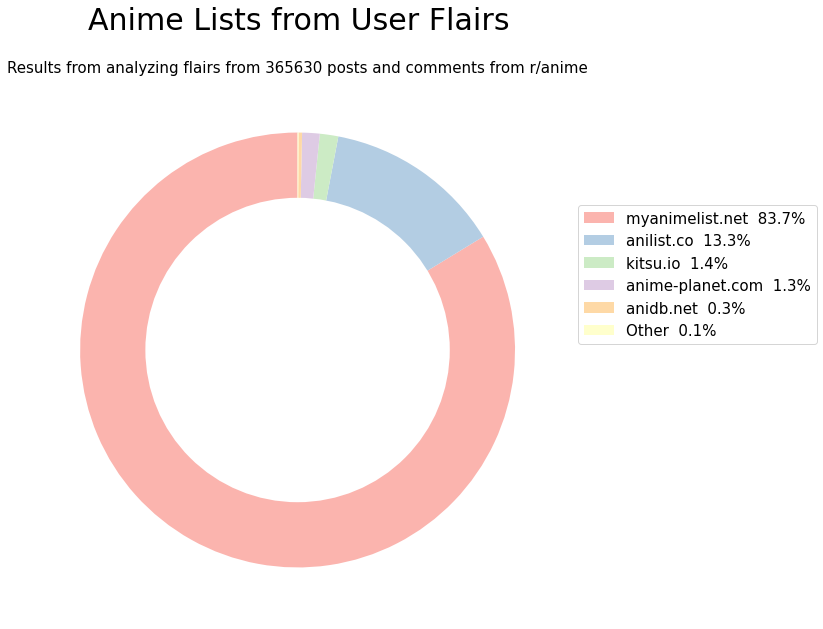

In [234]:
fig, axes = plt.subplots()

fig.set_figheight(10)
fig.set_figwidth(15)

# Draw the pie chart
pie = axes.pie(domain_pct.values(),
        pctdistance=1.1,
        colors=plt.cm.Pastel1.colors[:len(domain_pct)],
        startangle=90)

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# create labels
labels = [f'{item[0]}  {item[1]:.1f}%' for item in domain_pct.items()]

# title
plt.suptitle("Anime Lists from User Flairs", x=0.514, y=0.98, fontsize=30)
# subtitle
plt.title(f"Results from analyzing flairs from {len(posts_df)+len(comments_df)} posts and comments from r/{subreddit}", fontsize=15)

plt.legend(pie[0],labels, bbox_to_anchor=(1,0.5), loc="lower right", 
           prop={'size': 15}, bbox_transform=plt.gcf().transFigure)
plt.show()

In [212]:
pct_used = domain_pct['myanimelist.net']+domain_pct['anilist.co']
print(f'myanimelist.net and anilist.co represent {pct_used:.2f}% of the anime lists extracted')

myanimelist.net and anilist.co represent 97.00% of the anime lists extracted


## Extract and Store Anime List Data
From the anime list breakdown, we can see that 97% of the anime lists are either myanimelist.net or anilist.co, only links which match either of these will be used.

We are going to match against the following patterns:
**myanimelist**
- MAL.co/{username}
- myanimelist.net/animelist/{username}
- myanimelist.net/profile/{username}
- myanimelist.net/{username}

**anilist**
- anilist.co/user/{username}
- anilist.co/user/{username}/animelist
- anilist.co/{username}

We should expect to extract 3791 and 601 usernames, for myanimelist and anilist, respectively.

In [258]:
# create a list of dictionaries
# ids - identifier for the list
# idtype - username, userid, listid, etc
# flair - full flair
user_info = []
unmatched = []

for fl in link_flairs:
    
    # match against myanimelist
    p_1 = r'MAL.co/(\w+)'
    p_2 = r'myanimelist.net/animelist/(\w+)'
    p_3 = r'myanimelist.net/profile/(\w+)'
    p_4 = r'myanimelist.net/(\w+)'
    link_match = re.search(p_1, fl) or re.search(p_2, fl) or re.search(p_3, fl) or re.search(p_4, fl) 
    if link_match:
        # extract MAL username
        username = link_match.group(1)
        
        if not (username == 'profile' or username == 'animelist'):
            user_info.append({'ids': username, 'idtype': 'username', 'flair': fl, 'site': 'MAL', 'sub': 'anime'})
        else:
            print(username)
        continue
    
    # match against anilist
    p_1 = r'anilist.co/user/(\w+)'
    p_2 = r'anilist.co/(\w+)'
    link_match = re.search(p_1, fl) or re.search(p_2, fl)
    if link_match:
        # extract anilist username
        username = link_match.group(1)
        if not (username == 'user'):
            user_info.append({'ids': username, 'idtype': 'username', 'flair': fl, 'site': 'anilist', 'sub': 'anime'})
        else:
            print(username)
        continue
        
    unmatched.append(fl)
    
user_info_df = pd.DataFrame(user_info)

profile
user
profile
animelist
profile
profile
profile
user
profile
animelist
animelist
animelist


In [262]:
user_info_df['site'].value_counts()

MAL        3780
anilist     599
Name: site, dtype: int64

We can see that we are missing 12 total, which is equal to the number of incomplete anime list links which were printed out during extraction

In [261]:
unmatched[:10]

['9anime.ru/watch/rascal-does-dream-of-a-dreaming-girl',
 'https://kitsu.io/users/NinjaNirvana',
 'https://kitsu.io/users/',
 'http://www.animenewsnetwork.com/bbs/phpBB2/profile.php',
 'https://kitsu.io/users/thibaultmol',
 'http://anidb.net/u240389',
 'youtube.com/videoholocaust',
 'https://kitsu.io/users/Czajkowskihn',
 'https://www.youtube.com/user/shaggyjebus',
 'http://anidb.net/perl-bin/animedb.pl?show=userpage&uid=663539']

In [263]:
user_info_df.head(4)

,ids,idtype,flair,site,sub
0,SonAnka,username,https://myanimelist.net/profile/SonAnka,MAL,anime
1,RiverSorcerer,username,https://myanimelist.net/profile/RiverSorcerer,MAL,anime
2,phiraeth,username,https://myanimelist.net/profile/phiraeth,MAL,anime
3,MoghyBear,username,https://myanimelist.net/profile/MoghyBear,MAL,anime


In [266]:
user_info_df.to_csv(f'./data/{subreddit}_animelists_{num_posts}_{num_comment_posts}.csv', sep=';', header=True, index=False, columns=list(user_info_df.axes[1]))